In [1]:
from othello_rules import *
from othello_net import *
from tensorflow.python.framework import ops
from datetime import datetime
from example_states import *
from feature_extractor import *
from training_utils import *
import numpy as np


In [2]:

test_state = initialize_game()
test_state = make_move(test_state, 56, -1)
x = test_state
#print(find_legal_moves(test_state, 1))
#print(test_state)
#test = board_to_input(x, 1)
#print(test[:,:,10])
#print(test[:,:,16])
print("pressibus example:")

test = gen_pressibus_example()
print(test)
#print(find_legal_moves(test, 1))
#test = board_to_input(test, 1)
#print(test[:,:,10])
#print("legal move grid")
#print(test[:,:,5]) #legal move grid
#print("sum player stability")
#print(test[:,:,12]) # sum player stability
#print("sum opponent stability")
#print(test[:,:,13]) # sum opponent stability
#print("current player stability")
#print(test[:,:,14]) # current player stability
#print("current opponent stability")
#print(test[:,:,16]) #current opponent stability



pressibus example:
[[ 1.  1. -1.  1.  0.  0.  0.  0.]
 [ 1. -1.  1.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  0.  0.  0.  1.  0.]
 [-1.  1.  1.  0.  1. -1.  0.  1.]
 [ 1. -1. -1.  1. -1.  0.  1.  1.]
 [ 0. -1. -1. -1.  0.  0.  1.  1.]
 [-1. -1.  1.  1. -1.  1.  1.  1.]
 [ 1.  1. -1.  1.  0.  0.  1.  1.]]


In [3]:
# The following actions perform all the necessary flips for each feature
x_original = np.arange(9).reshape((3,3))
print("Original ")
print(x_original)
x_upright = np.transpose(x_original)
print("flip upright")
print(x_upright)
x_upleft = np.rot90(np.rot90(x_upright))
print("flip upleft")
print(x_upleft)
print("\n")
x_both_flips = np.transpose(x_upleft)
print(x_both_flips)
print(x_original)

Original 
[[0 1 2]
 [3 4 5]
 [6 7 8]]
flip upright
[[0 3 6]
 [1 4 7]
 [2 5 8]]
flip upleft
[[8 5 2]
 [7 4 1]
 [6 3 0]]


[[8 7 6]
 [5 4 3]
 [2 1 0]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


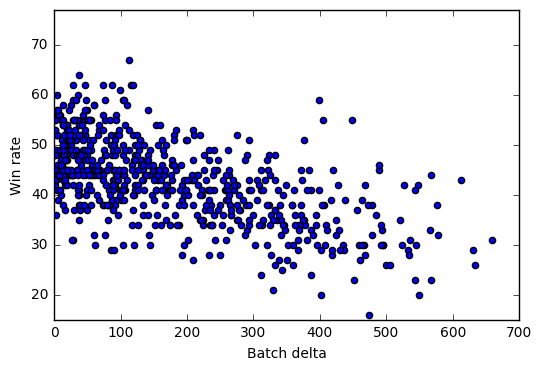

-0.0331448153324


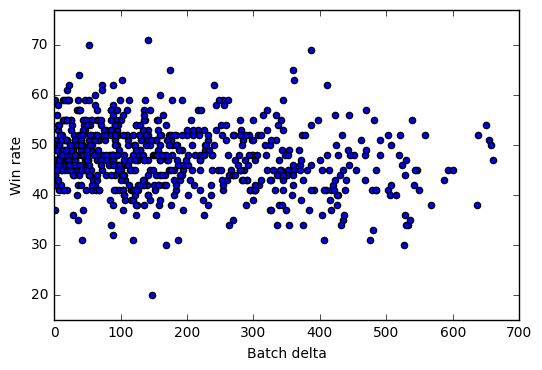

-0.00893974401467


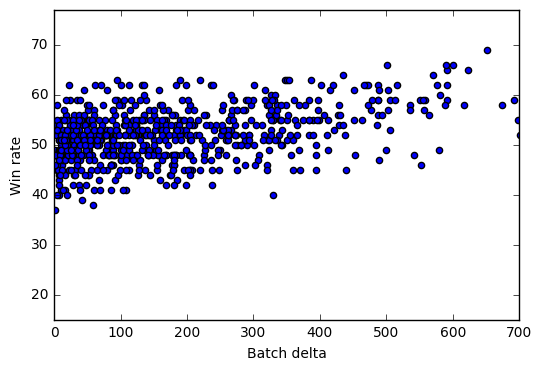

0.0147208377501


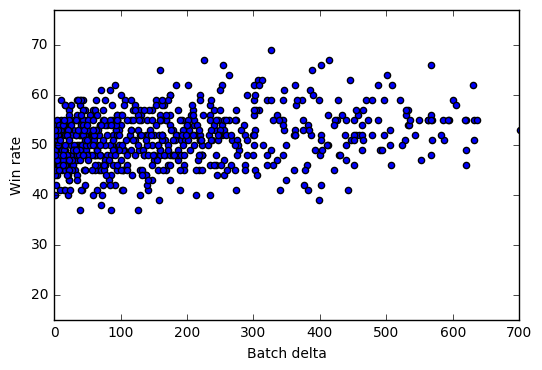

0.00884641293492


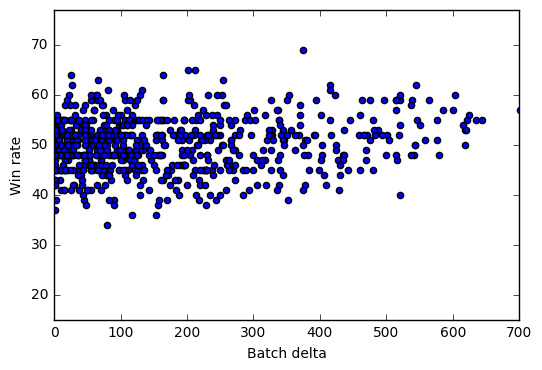

0.00570054605909


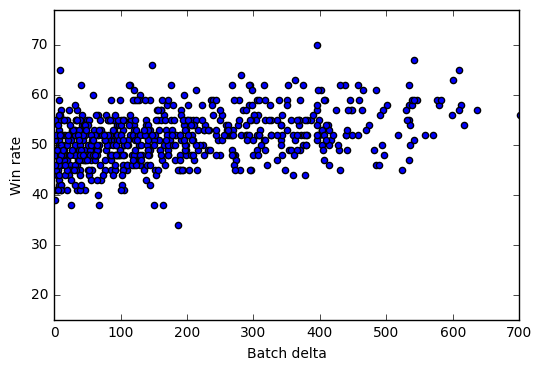

0.0129570069935


In [13]:
### import matplotlib.pyplot
import pylab
from scipy.stats import linregress
%matplotlib inline
def prep_winrates_deltas(wrs_file, log=False):
    winrates = []
    delta_batches = []
    batch = 0
    with open(wrs_file) as f:
        for line in f:
            batch = batch+1
            if log:
                print(line)
            if batch > 1:
                #print(line)
                l = []
                t = line.split(' ')
                wr = t[5]
                wr = wr[2:-1]
                opp_model = t[6]
                if opp_model == 'els/layers8filters64.ckpt':
                    continue
                try:
                    mdl = opp_model.split('/')[3]
                    opponent_batch = mdl[6:-5]
                except:
                    opp_model = t[8]
                    if opp_model == 'layers8filters64.ckpt':
                        continue
                    opponent_batch = opp_model[6:-5]
                    wr = t[7]
                    wr = wr[2:-1]
                if opponent_batch != '8filters64':
                    winrates.append(int(wr))
                    try: 
                        delta =  int(batch) - int(opponent_batch)
                    except:
                        delta = int(batch) - 0
                    if delta < 0:
                        print('fishy')
                        print(line)
                        print(batch)
                        print(opponent_batch)
                    try:
                        delta_batches.append(int(batch) - int(opponent_batch))
                    except:
                        delta_batches.append(int(batch) - 0)
    return winrates, delta_batches


plot_length = 700
upper_y = 77
lower_y = 15
winrates, deltas = prep_winrates_deltas("rl_logs.txt")
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([10,75])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
#print(winrates)
#print(delta_batches)
'''
print("full length")
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)
'''

deltas = deltas[0:plot_length]
winrates = winrates[0:plot_length]
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)

winrates, deltas = prep_winrates_deltas("logs_rl_2.txt")
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
'''
print("full length")
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)
'''

deltas = deltas[0:plot_length]
winrates = winrates[0:plot_length]
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)

winrates, deltas = prep_winrates_deltas("logs_rl_3.txt")
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
'''
print("full length")
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)
'''

deltas = deltas[0:plot_length]
winrates = winrates[0:plot_length]
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)

winrates, deltas = prep_winrates_deltas("logs_rl_4.txt")
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
'''
print("full length")
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)
'''
deltas = deltas[0:plot_length]
winrates = winrates[0:plot_length]
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)


winrates, deltas = prep_winrates_deltas("logs_rl_5.txt")
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
'''
print("full length")
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)
'''
deltas = deltas[0:plot_length]
winrates = winrates[0:plot_length]
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)

winrates, deltas = prep_winrates_deltas("logs_rl_6.txt")
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
'''
print("full length")
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)
'''
deltas = deltas[0:plot_length]
winrates = winrates[0:plot_length]
axes = matplotlib.pyplot.gca()
axes.set_xlim([0,plot_length])
axes.set_ylim([lower_y,upper_y])
matplotlib.pyplot.xlabel('Batch delta')
matplotlib.pyplot.ylabel('Win rate')
matplotlib.pyplot.scatter(deltas, winrates)
matplotlib.pyplot.show()
print(linregress(deltas,winrates).slope)


